<a href="https://colab.research.google.com/github/saad1ibn2akhter/introduction_to_ml_with_python/blob/main/Introduction_to_data_analysis_IBM_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Data Analysis — Basics

## Table of Contents

1. **DataFrame Operations** — Remove rows/columns, concatenate DataFrames  
2. **Data Visualization** — `regplot`, `boxplot`, `distplot`, pivot plot  
3. **Linear Regression** — Using scikit-learn  
4. **Residual Plot** — `residplot`  
5. **Polynomial Regression** — Non-linear fitting  
6. **StandardScaler** — Data normalization  
7. **Pipeline** — Combine preprocessing + model  
8. **Model Evaluation** — \( R^2 \), Mean Squared Error  
9. **Train/Test Split** — `train_test_split`  
10. **Cross-Validation** — Score  
11. **Cross-Validation Prediction**  
12. **Ridge Regression** — L2 regularization  
13. **Grid Search** — Hyperparameter tuning  
14. **Practice Problems**  
15. **Reference:** [Cheat Sheet (PDF)](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/labs/Python%20Cheat%20Sheet%20for%20Data%20Analysis.pdf)


In [96]:
#libraries
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression , Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict , GridSearchCV

path = 'used_cars_dataset.csv'
df = pd.read_csv(path )


In [14]:
#Data frame operations
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [18]:
pearson_coef , p_value  = stats.pearsonr(df['horsepower'],df['price'] )
print("pearson coefficient : ",pearson_coef , "p_value : ",p_value)

pearson coefficient :  0.8095745670036562 p_value :  6.369057428259571e-48


In [23]:
#Linear Regression
lm = LinearRegression()
X = df[['horsepower','highway-mpg','engine-size']]
Y = df[['price']]
lm.fit(X,Y)
yhat = lm.predict(X)
intercept = lm.intercept_
coef = lm.coef_
print(f"coef : {coef} , intercept : {intercept}")
print("Linear Regression prediction : " , yhat)


coef : [[  41.17449204 -139.42625264  120.85329253]] , intercept : [-2105.36456095]
Linear Regression prediction :  [[14411.42326337]
 [14411.42326337]
 [18980.12510938]
 [11084.65493392]
 [15998.37224991]
 [15374.2210318 ]
 [15374.2210318 ]
 [15374.2210318 ]
 [16702.32059348]
 [11062.05340199]
 [11062.05340199]
 [18792.75387723]
 [18792.75387723]
 [19211.03263514]
 [27579.35357138]
 [27579.35357138]
 [27858.20607665]
 [ -146.5294884 ]
 [ 5658.31734628]
 [ 5658.31734628]
 [ 5854.82086747]
 [ 6273.09962539]
 [ 9755.26871606]
 [ 6273.09962539]
 [ 6273.09962539]
 [ 6273.09962539]
 [ 9755.26871606]
 [12079.30484831]
 [19371.82035644]
 [ 3872.24124787]
 [ 6844.20214676]
 [ 4056.61246067]
 [ 7401.90715731]
 [ 7401.90715731]
 [ 7401.90715731]
 [ 7401.90715731]
 [10128.43759592]
 [10128.43759592]
 [10128.43759592]
 [10128.43759592]
 [11443.18623969]
 [10983.73298974]
 [10477.5999627 ]
 [11938.52020742]
 [33672.39671116]
 [33672.39671116]
 [45710.27942398]
 [ 7369.93668638]
 [ 6393.95291792]
 [

/tmp/ipython-input-2118499657.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['horsepower'],hist=False )


<Axes: xlabel='horsepower', ylabel='price'>

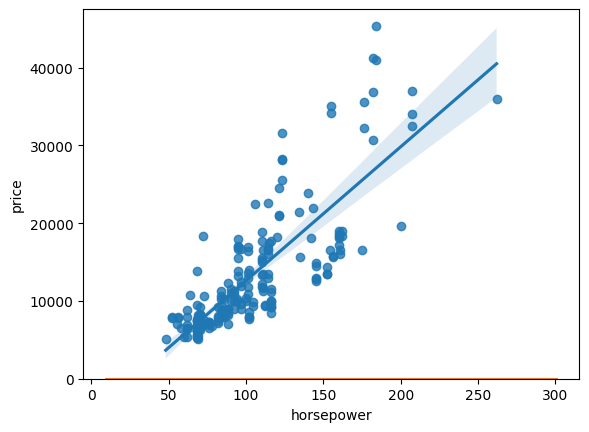

In [37]:
sns.regplot(x=df[['horsepower']],y=df[['price']] )
plt.ylim(0,)
sns.distplot(x=df['horsepower'],hist=False )


In [67]:
#Non-linear fittings -> Polynomial Regression
#in this case linear regression model underfits/overfits
Input = (
    ('scale' ,StandardScaler()),
    ('polynomial' , PolynomialFeatures(degree=2, include_bias=False)) ,
    ('model',LinearRegression())
    )
pipe = Pipeline(Input)
pipe.fit(X,Y)
yhat_pipe = pipe.predict(X)
print(yhat_pipe)


[[13659.91467389]
 [13659.91467389]
 [18260.30982358]
 [10060.44406848]
 [17137.52250812]
 [15505.85383005]
 [15505.85383005]
 [15505.85383005]
 [17979.28484721]
 [10255.75030099]
 [10255.75030099]
 [17627.97474151]
 [17627.97474151]
 [19074.75164047]
 [25443.83325906]
 [25443.83325906]
 [26190.09688587]
 [ 4617.04774061]
 [ 5822.11109801]
 [ 5822.11109801]
 [ 5558.33516438]
 [ 5677.68522953]
 [ 9010.9961491 ]
 [ 5677.68522953]
 [ 5677.68522953]
 [ 5677.68522953]
 [ 9010.9961491 ]
 [12098.37413834]
 [18297.51045618]
 [ 9651.59583406]
 [ 6007.38116284]
 [ 3997.04715404]
 [ 6644.62206288]
 [ 6644.62206288]
 [ 6644.62206288]
 [ 6644.62206288]
 [ 9240.97331713]
 [ 9240.97331713]
 [ 9240.97331713]
 [ 9240.97331713]
 [10864.91944572]
 [ 9827.9972122 ]
 [11575.35309723]
 [11954.54720802]
 [33599.43209767]
 [33599.43209767]
 [41220.84540041]
 [ 7955.02091159]
 [ 5819.91313857]
 [ 5819.91313857]
 [ 5819.91313857]
 [ 5819.91313857]
 [ 9722.92746285]
 [ 9722.92746285]
 [ 9722.92746285]
 [14646.11

In [42]:
#R^2 value - linear and non-linear circumstances
lm.fit(X,Y)
R2_score  = lm.score(X,Y)
print("R^2 (linear) : ", R2_score )

mse = mean_squared_error(yhat_pipe, Y)
print("Mean Squared Error : ",mse)

R^2 (linear) :  0.7921420253198568
Mean Square Error :  10819563.380784573


In [48]:
# x_1d = X.squeeze()
# f = np.polyfit(x_1d, Y, 3)
# p = np.poly1d(f)
# R2_score = r2_score(Y, p(x_1d))
# print("R2:", R2_score)

In [49]:
#splitting data for testing and training

x_train ,x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)


In [65]:
#Cross validation score and prediction

lr2 = LinearRegression()
r_cross = cross_val_score(lr2,X,Y , cv=2)#in this case 2nd order gives the optimal 71.2%
mean_outcome = r_cross.mean()
print(f"outcome : { mean_outcome*100} %")
yhat3 = cross_val_predict(lr2,X,Y,cv=2)
print("MSE here is -----> " , mean_squared_error(Y,yhat3))

# print(yhat3)


outcome : 71.18772759290968 %
MSE here is ----->  16087730.107130464


In [94]:
#Ridge Regression
Input = (('scalar' , StandardScaler()),
    ('ridge',Ridge(alpha=0.1)))

ridge_pipeline = Pipeline(Input)
ridge_pipeline.fit(x_train,y_train)
yhat_ridge = ridge_pipeline.predict(x_test)

print("R^2 : " , r2_score(y_test,yhat_ridge))
print("MSE : ", mean_squared_error(y_test,yhat_ridge ))


R^2 :  0.6904497649895551
MSE :  16404862.609737469


In [99]:
#Grid Search
ridge = Ridge()
parameters = {'alpha': [0.001, 0.1, 1, 10, 100]}

grid = GridSearchCV(ridge , parameters  , cv=4)
grid.fit(x_train , y_train)

print("best r^2 : ", grid.best_score_)


best r^2 :  0.7968022356945991
